NOMBRE: DAVID MALDONADO

ORDEN:
Supongamos que usted trabaja en el servicio de salud y recibe muestras que provienen de mujeres con cáncer de mama.
Los médicos han extraído características y las han anotado, su trabajo es crear un modelo que sea capaz de identificar si un paciente tiene o no cáncer.
Recordemos que un falso positivo no es tan preocupante como un falso negativo, ya que en el futuro se le hacen más pruebas a las pacientes y hay oportunidades de descubrir que estábamos en un error.
Sin embargo, un falso negativo puede llevar a que el cáncer se desarrolle sin supervisión durante más tiempo del necesario y podría llevar a daños más graves o incluso la muerte de la paciente.
Teniendo esto en cuenta, desarrolla un modelo que funcione lo mejor posible y explica qué decisiones has tomado en su elaboración y por que.
A entregar obligatoriamente:
-	Link a un repositorio público de Github que contenga al menos:
-	Un archivo Jupyter Notebook con todas las celdas ejecutadas en orden. Es decir, que antes de subir el archivo a github habéis limpiado el notebook y luego lo habéis ejecutado desde el principio).
-	Un archivo Readme en el que se explica el proyecto y el ejercicio. Tened en cuenta que este repositorio puede serviros como CV en el futuro y que los recruiters suelen mirar los archivos Readme.md
-	Una carpeta data con el dataset.
En el notebook debe aparecer el proceso de preprocesado de datos desde los archivos originales a ser posible.
En el notebook debéis probar al menos con 3 modelos, evaluarlos y decidir cual es el mejor, justificando la respuesta en base a las matrices de confusión que aparecen al evaluar el error en training y en test.
El dataset y su descripción aparecen aquí:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29


Regresión Logística

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Cargamos los conjuntos de datos desde los archivos CSV
data = pd.read_csv("wdbc.data", sep=",")

In [3]:
#se hace copia del dataset
datos = data.copy()

In [4]:
nombres_columnas = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
datos.columns = nombres_columnas

In [5]:
# validamos si hay datos nulos
print("Verificación de valores nulos en el dataset:")
print(datos.isnull().sum())

Verificación de valores nulos en el dataset:
ID            0
Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64


In [6]:
# Separamos las características (X) y la variable objetivo (y)
X = datos.drop(['ID', 'Diagnosis'], axis=1)
y = datos['Diagnosis'].map({'M': 1, 'B': 0})  # Convertimos Maligno 1 /Benigno 0

In [7]:
RegX_train, RegX_test, Regy_train, Regy_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
RegX_train = scaler.fit_transform(RegX_train)
RegX_test = scaler.transform(RegX_test)

In [9]:
# Aplicamos el modelo de Regresión Logística
modelo_rl = LogisticRegression()
modelo_rl.fit(RegX_train, Regy_train)
y_pred = modelo_rl.predict(RegX_test)

In [10]:
# funcion para generar matriz de confusion
def plot_confusion_matrix(y_true, y_pred, title='Matriz de Confusión', cmap='Blues'):
    matriz_confusion = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    plt.imshow(matriz_confusion, interpolation='nearest', cmap=cmap, vmin=0, vmax=np.max(matriz_confusion))
    plt.title(title)
    plt.colorbar()
    threshold = matriz_confusion.max() / 2
    for i in range(matriz_confusion.shape[0]):
        for j in range(matriz_confusion.shape[1]):
            color = "white" if matriz_confusion[i, j] > threshold else "black"
            plt.text(j, i, matriz_confusion[i, j], horizontalalignment="center", color=color)
    plt.tight_layout()
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()

In [11]:
# funcion para calcular error y tasas de acierto
def calculate_error_and_accuracy(y_true, y_pred):
    matriz_confusion = confusion_matrix(y_true, y_pred)
    
    VP = matriz_confusion[0, 0]
    VN = matriz_confusion[1, 1]
    FP = matriz_confusion[0, 1]
    FN = matriz_confusion[1, 0]

    # Calculando la tasa de error
    error_rate = (FP + FN) / (VP + VN + FP + FN)

    # Calculando la tasa de acierto (accuracy)
    accuracy = (VP + VN) / (VP + VN + FP + FN)

    return error_rate, accuracy

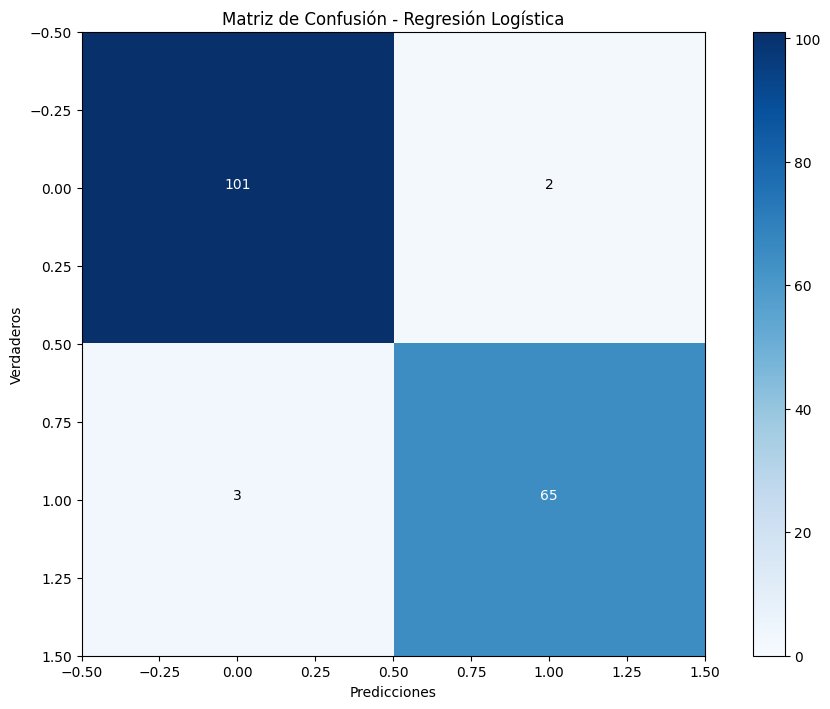

In [12]:
plot_confusion_matrix(Regy_test, y_pred, title='Matriz de Confusión - Regresión Logística')

In [13]:
error_rate, accuracy = calculate_error_and_accuracy(Regy_test, y_pred)
print("\nTasa de Error del Modelo:", error_rate)
print("Tasa de Acierto del Modelo (Accuracy):", accuracy)


Tasa de Error del Modelo: 0.029239766081871343
Tasa de Acierto del Modelo (Accuracy): 0.9707602339181286


In [14]:
#con oversampling
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

c:\Users\DAVID MALDONADO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\DAVID MALDONADO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [15]:
#variables
RegX_trainover, RegX_testover, Regy_trainover, Regy_testover = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [16]:
# Escalamos las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(RegX_trainover)
X_test_scaled = scaler.transform(RegX_testover)

In [17]:
modelo_rl = LogisticRegression()
modelo_rl.fit(X_train_scaled, Regy_trainover)
y_predover = modelo_rl.predict(X_test_scaled)

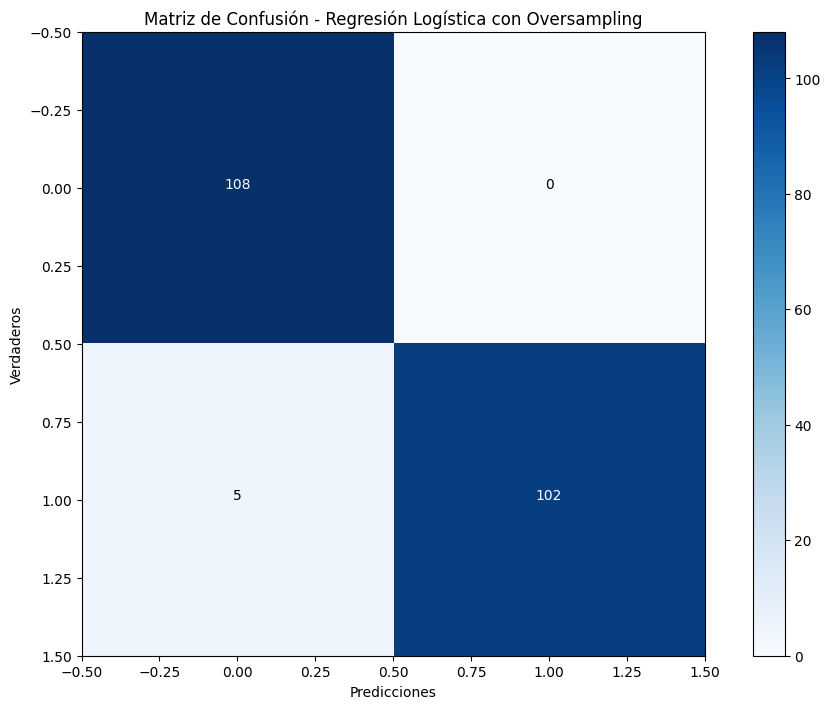

In [18]:
#matriz de confusión
plot_confusion_matrix(Regy_testover, y_predover, title='Matriz de Confusión - Regresión Logística con Oversampling')

In [19]:
error_rate, accuracy = calculate_error_and_accuracy(Regy_testover, y_predover)
print("\nTasa de Error del Modelo:", error_rate)
print("Tasa de Acierto del Modelo (Accuracy):", accuracy)


Tasa de Error del Modelo: 0.023255813953488372
Tasa de Acierto del Modelo (Accuracy): 0.9767441860465116


MODELO k VECINOS

In [20]:
kvecX_train, kvecX_test, kvecy_train, kvecy_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
scaler = StandardScaler()
kvecX_train = scaler.fit_transform(kvecX_train)
kvecX_test = scaler.transform(kvecX_test)

In [22]:
modelo_kvec = KNeighborsClassifier(n_neighbors=5)
modelo_kvec.fit(kvecX_train, kvecy_train)
kvecy_pred = modelo_kvec.predict(kvecX_test)

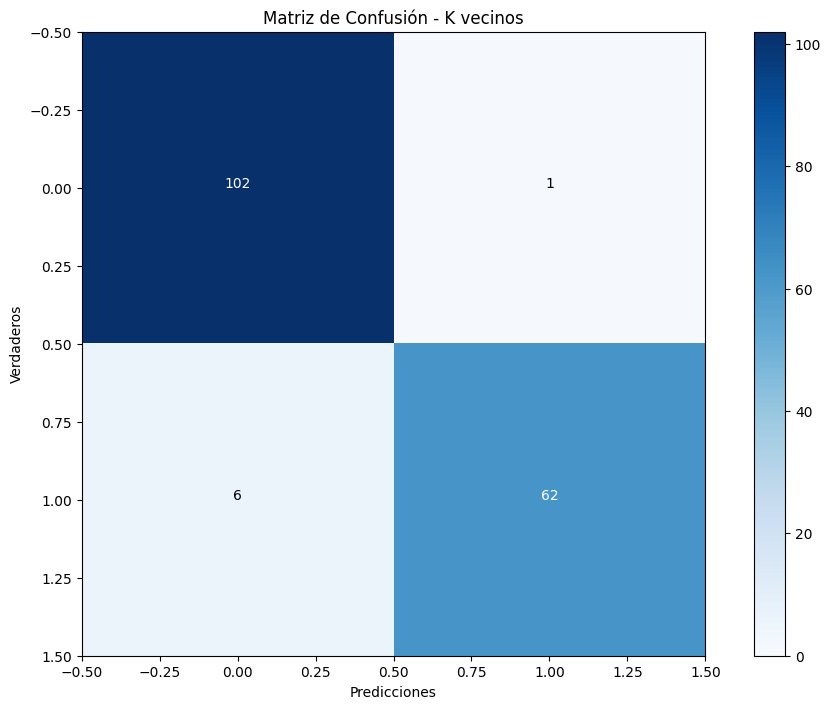

In [23]:
plot_confusion_matrix(kvecy_test, kvecy_pred, title='Matriz de Confusión - K vecinos')

In [24]:
error_rate, accuracy = calculate_error_and_accuracy(kvecy_test, kvecy_pred)
print("\nTasa de Error del Modelo:", error_rate)
print("Tasa de Acierto del Modelo (Accuracy):", accuracy)


Tasa de Error del Modelo: 0.04093567251461988
Tasa de Acierto del Modelo (Accuracy): 0.9590643274853801


In [25]:
smote = SMOTE(random_state=42)
kvecX_smote, kvecy_smote = smote.fit_resample(X, y)


In [26]:
kvecX_trainover, kvecX_testover, kvecy_trainover, kvecy_testover = train_test_split(kvecX_smote, kvecy_smote, test_size=0.3, random_state=42)

In [27]:
kvecX_trainover_scaled = scaler.fit_transform(kvecX_trainover)
kvecX_testover_scaled = scaler.transform(kvecX_testover)

In [28]:
modelo_kvec.fit(kvecX_trainover_scaled, kvecy_trainover)
kvecy_predover = modelo_kvec.predict(kvecX_testover_scaled)

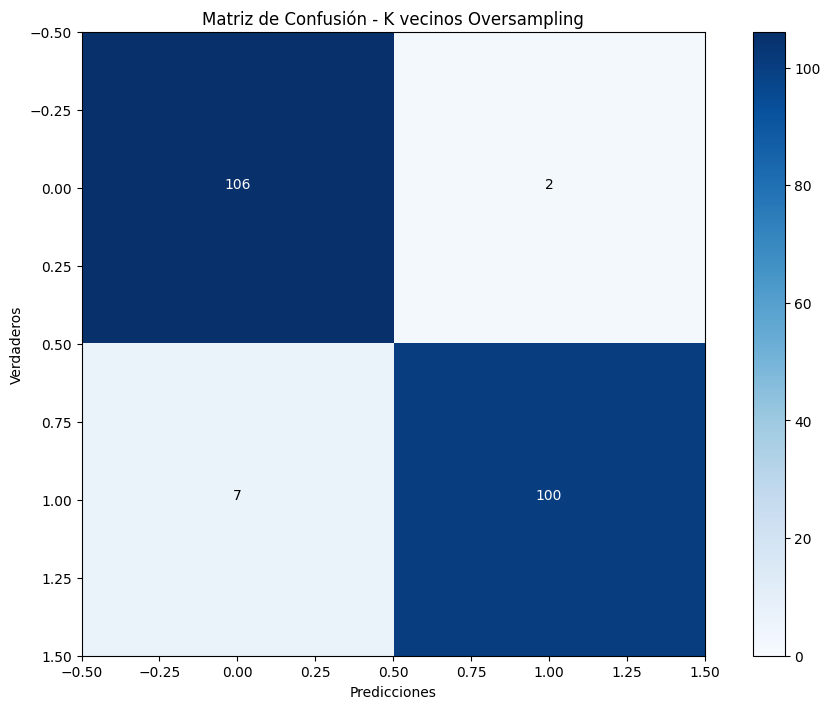

In [29]:
plot_confusion_matrix(kvecy_testover, kvecy_predover, title='Matriz de Confusión - K vecinos Oversampling')

In [30]:
error_rate, accuracy = calculate_error_and_accuracy(kvecy_testover, kvecy_predover)
print("\nTasa de Error del Modelo:", error_rate)
print("Tasa de Acierto del Modelo (Accuracy):", accuracy)


Tasa de Error del Modelo: 0.04186046511627907
Tasa de Acierto del Modelo (Accuracy): 0.958139534883721


Random Forest

In [31]:
rfoX_train, rfoX_test, rfoy_train, rfoy_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
scaler = StandardScaler()
rfoX_train = scaler.fit_transform(rfoX_train)
rfoX_test = scaler.transform(rfoX_test)

In [33]:
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(rfoX_train, rfoy_train)
rfoy_pred = modelo_rf.predict(rfoX_test)

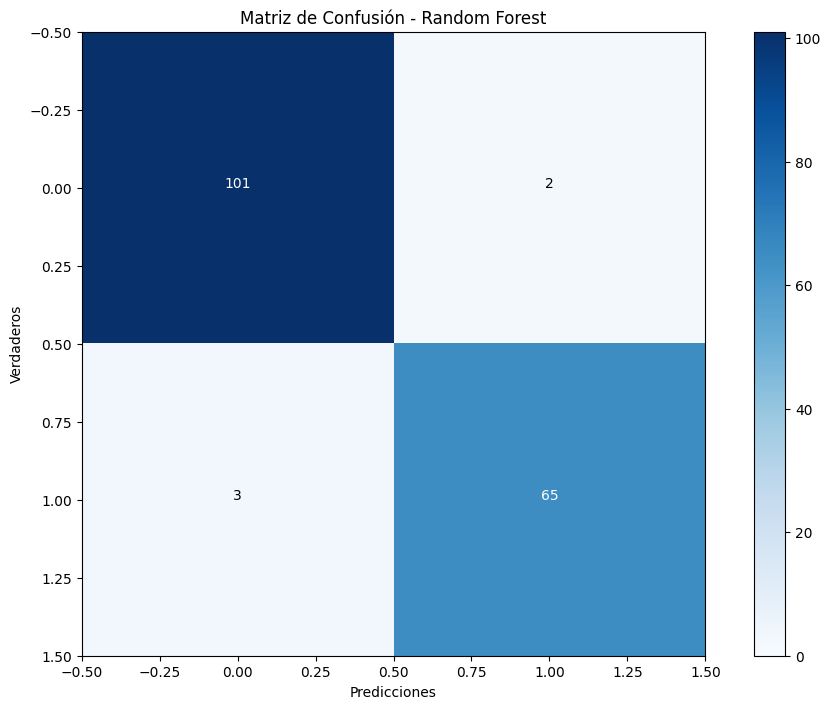

In [34]:
plot_confusion_matrix(rfoy_test, rfoy_pred, title='Matriz de Confusión - Random Forest')

In [35]:
error_rate, accuracy = calculate_error_and_accuracy(rfoy_test, rfoy_pred)
print("\nTasa de Error del Modelo:", error_rate)
print("Tasa de Acierto del Modelo (Accuracy):", accuracy)


Tasa de Error del Modelo: 0.029239766081871343
Tasa de Acierto del Modelo (Accuracy): 0.9707602339181286


In [36]:
# con oversampling
smote = SMOTE(random_state=42)
rfoX_smote, rfoy_smote = smote.fit_resample(X, y)
rfoX_train_over, rfoX_test_over, rfoy_train_over, rfoy_test_over = train_test_split(rfoX_smote, rfoy_smote, test_size=0.3, random_state=42)

In [37]:
# Escalamiento 
rfoX_train_over = scaler.fit_transform(rfoX_train_over)
rfoX_test_over = scaler.transform(rfoX_test_over)

In [38]:
# Modelo Random Forest 
modelo_rf.fit(rfoX_train_over, rfoy_train_over)
rfoy_pred_over = modelo_rf.predict(rfoX_test_over)

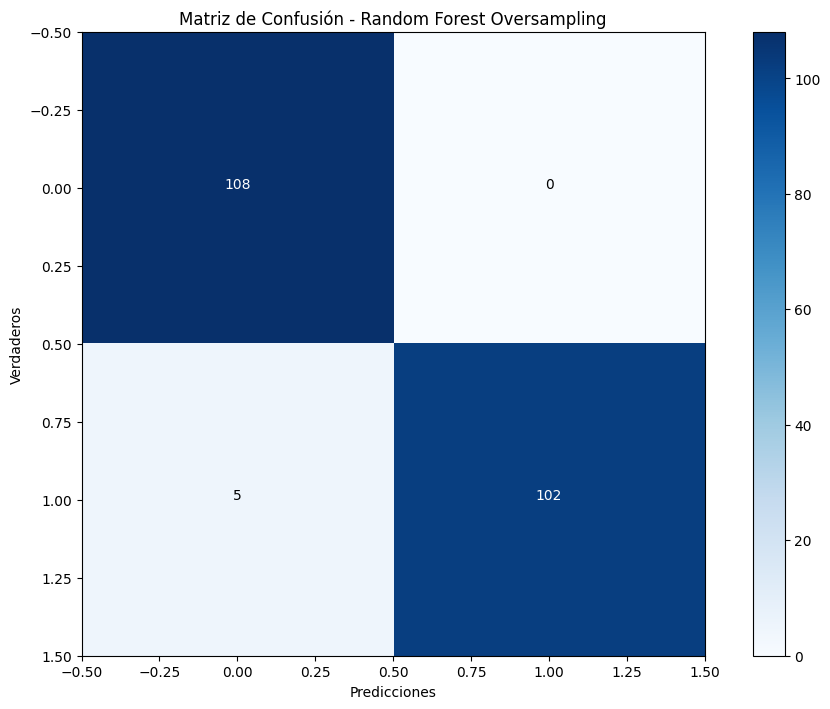

In [39]:
plot_confusion_matrix(rfoy_test_over, rfoy_pred_over, title='Matriz de Confusión - Random Forest Oversampling')

In [40]:
error_rate, accuracy = calculate_error_and_accuracy(rfoy_test_over, rfoy_pred_over)
print("\nTasa de Error del Modelo:", error_rate)
print("Tasa de Acierto del Modelo (Accuracy):", accuracy)


Tasa de Error del Modelo: 0.023255813953488372
Tasa de Acierto del Modelo (Accuracy): 0.9767441860465116
